In [1]:
from SuitabilityModel import *

### Add three criteria
- dem_24
- dist_streams
- landuse2002

In [2]:
c1 = Criteria(arcpy.Raster(r'\\archive\CRData\ArcGISPro\raster-analysis\SuitabilityData\dem_24'))
c2 = Criteria(arcpy.Raster(r'\\archive\CRData\ArcGISPro\raster-analysis\SuitabilityData\dist_streams'))
c3 = Criteria(arcpy.Raster(r'\\archive\CRData\ArcGISPro\raster-analysis\SuitabilityData\landuse2002'))

### Define transformation parameters

In [3]:
c1_transform_params = {
    'from_scale': 1,
    'to_scale': 10,
    'remap': {
        (587, 935.8): 1,
        (935.8, 1283.6): 2,
        (1283.6, 1631.4): 3,
        (1631.4, 1979.2): 4,
        (1979.2, 2327): 5,
        (2327, 2674.8): 6,
        (2674.8, 3022.6): 7,
        (3022.6, 3370.4): 8,
        (3370.4, 3718.2): 9,
        (3718.2, 4066): 10,
    }
}

c2_transform_params = {
    'name': 'mssmall',
    'from_scale': 1,
    'to_scale': 10
}

c3_transform_params = {
    'from_scale': 1,
    'to_scale': 10,
    'remap': {
        5: 1,
        7: 1,
        11: 1,
        12: 1,
        13: 1,
        14: 1,
        17: 1,
        24: 1,
        41: 10,
        42: 10,
        43: 10,
        61: 1,
        62: 1,
        211: 1,
        212: 1
    }
}

In [4]:
c1.transform('range', c1_transform_params)
c2.transform('continous', c2_transform_params)
c3.transform('unique', c3_transform_params)

### Create a Model object and add criteria to the model

In [11]:
s = SuitabilityModel()
s.add_criteria(c1, 5)
s.add_criteria(c2, 1)
s.add_criteria(c3, 1)

### Calculate the model 

In [12]:
s.calculate()

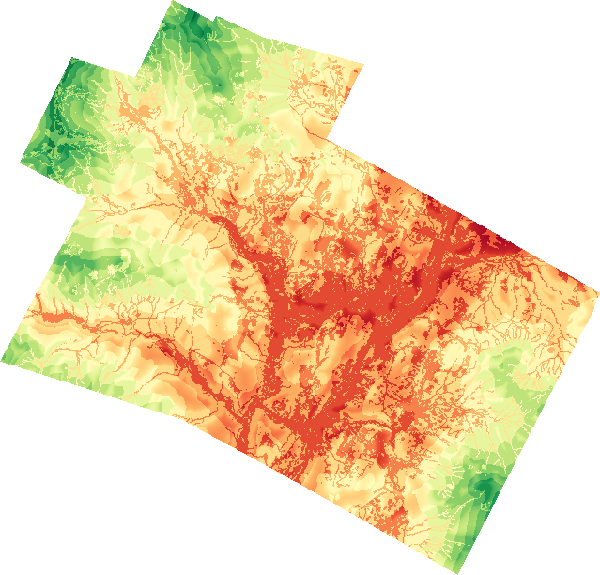

In [13]:
# Render output
arcpy.ia.Render(s.suitability_map, colormap = "Red-Yellow-Green (Continuous)")

In [14]:
# Show statistics
s.show_stats()

Mean: 31.293181306876
Min: 7.8808240890503
Max: 65.0


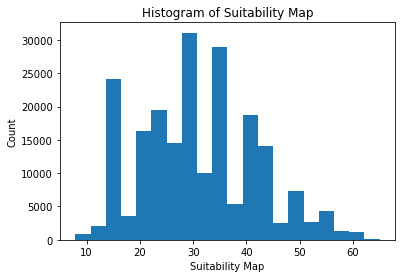

In [15]:
# Histogram of the output
s.show_hist()

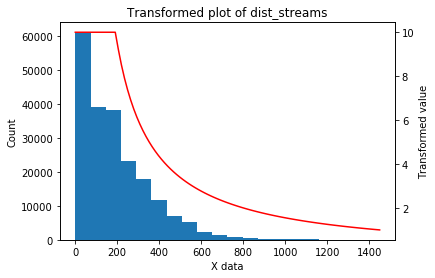

In [16]:
# Criteria two transformation plot
c2.show_transform_plot()